# Amazon Best BookSeller 

![](https://grammarfactory.com/wp-content/uploads/2018/03/book-bestseller-campaign-1024x683.jpg)

In [1]:
# Importing requre library

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%time

Wall time: 0 ns


In [2]:
# Importing DataSet

amz = pd.read_csv('bestsellers with categories.csv')
amz.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [3]:
# checking shape of dataset

amz.shape

(550, 7)

In [4]:
# getting rough information about the dataset

amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 23.7+ KB


In [5]:
# lets check any missing value present in data set

amz.isna().sum()

#'''There is not any kind of NaN value in data set'''

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
# checking duplicated item in a dataset

amz.duplicated().sum()

# There is not any kind of duplicated data set in it

0

In [7]:
# checking column vise duplication item

amz.Name.duplicated().sum()

199

In [8]:
amz.Author.duplicated().sum()

302

In [9]:
# let drop duplicated item in data set

amz.drop_duplicates(['Name', 'Author'], inplace = True)

In [10]:
amz.Author.duplicated().sum()

103

In [11]:
# lets check unique value in column
amz.Name.nunique()

351

In [12]:
amz.Author.nunique()   # if you add duplicated 103 no. so, answer comes 351.

248

In [13]:
# Get little bit of satistical info. of rearange data set

amz.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,351.0,4.608832,0.226669,3.3,4.5,4.6,4.8,4.9
Reviews,351.0,9799.683761,10871.356548,37.0,3442.5,6346.0,11470.5,87841.0
Price,351.0,13.076923,10.050860,0.0,8.0,12.0,16.0,105.0
Year,351.0,2013.515670,3.282710,2009.0,2010.0,2013.0,2016.0,2019.0


In [14]:
# sorted data set with respective to 'Reviews', User rating 

amz.sort_values(['User Rating', 'Reviews'], ascending = False, inplace = True)

In [15]:
amz.reset_index().head(50)

,index,Name,Author,User Rating,Reviews,Price,Year,Genre
0,245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
1,153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
2,187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
3,476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
4,40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
5,85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
6,207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction
7,157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
8,545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
9,303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction


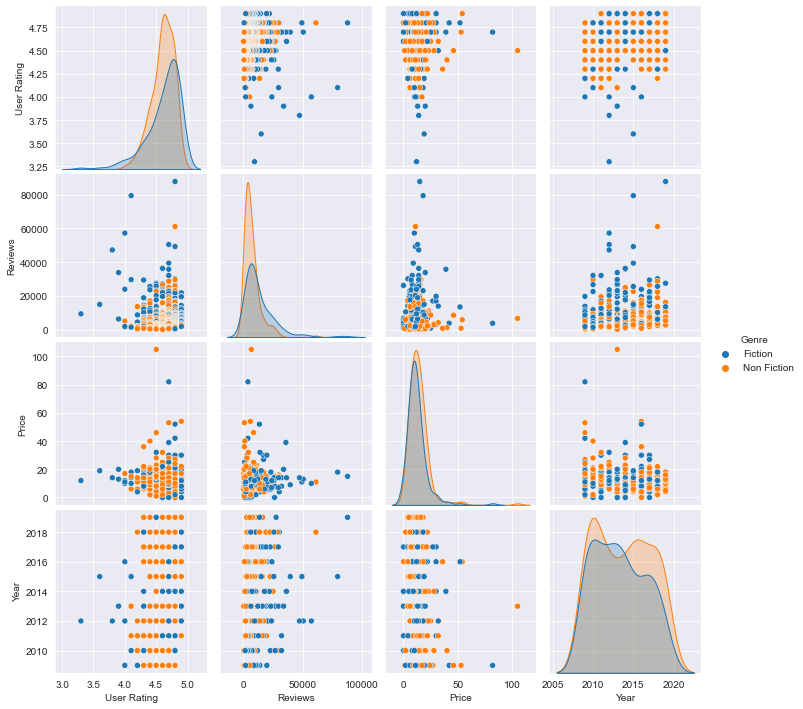

In [16]:
sns.pairplot(amz, hue= 'Genre');

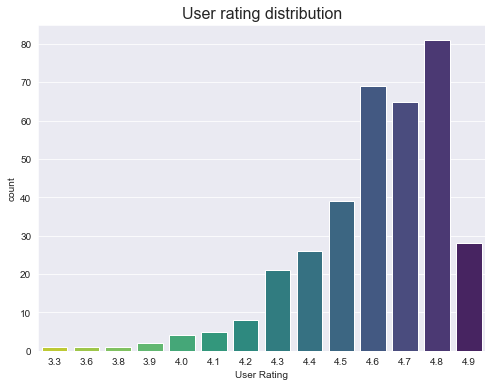

In [17]:
# data visualization

plt.figure(figsize=(8,6))
sns.countplot(amz['User Rating'], palette = 'viridis_r' )
plt.title('User rating distribution', fontsize= 16)
plt.show();

# graph will show that maximum user rating 4.8

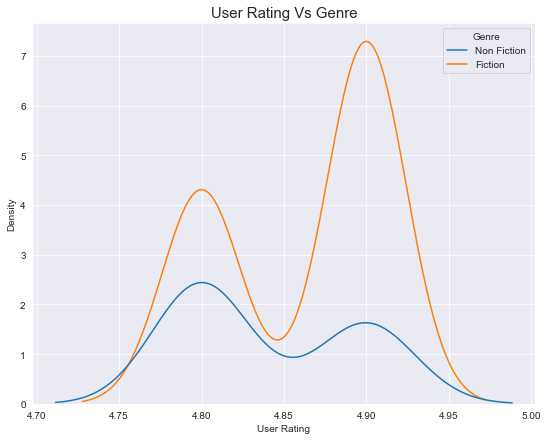

In [18]:
plt.figure(figsize=(9,7))

sns.kdeplot(amz['User Rating'].head(50), hue= amz.Genre);
plt.title('User Rating Vs Genre', fontsize = 15)
plt.show()

# graph will show that, amount of user rating books are belonges to fiction genre.

<Figure size 1080x720 with 0 Axes>

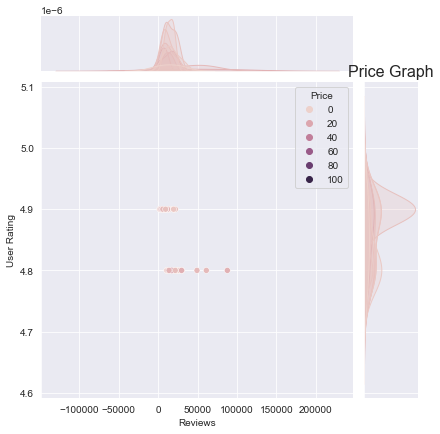

In [19]:
plt.figure(figsize=(15,10))

sns.jointplot(amz.Reviews.head(50), amz['User Rating'].head(50),
              hue = amz.Price,
              kind = 'scatter'
             )
plt.title('Price Graph', fontsize = 16)
plt.show();

# Graph show that, price of top 50 books in data set not more than $20.

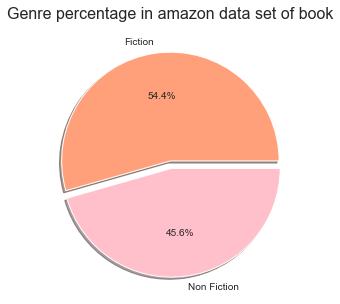

In [37]:
plt.figure(figsize = (7,5))
plt.pie(amz.Genre.value_counts(), labels =['Fiction', 'Non Fiction'],
       autopct = '%0.1f%%',
       shadow = True, 
       explode = [0,0.07],
       colors = ['lightsalmon','pink'])
plt.title('Genre percentage in amazon data set of book', fontsize = 16)
plt.show();

# total fiction and non fiction book in amazon data set.

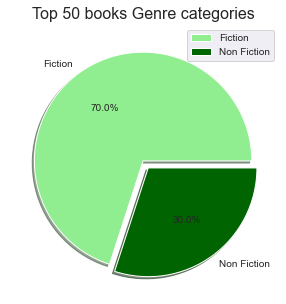

In [43]:
#check top 50 book Genre in amazon data set

plt.figure(figsize = (8,5))
plt.pie(amz.Genre.head(50).value_counts(), labels =['Fiction', 'Non Fiction'],
       autopct = '%0.1f%%',
       shadow = True, 
       explode = [0,0.08],
       colors = ['lightgreen','darkgreen'])
plt.title('Top 50 books Genre categories', fontsize = 16)
plt.legend()
plt.show();